In [ ]:
created final file with columns
Year
Region
Type of internet connection
Nr of estimated people
Nr pf people with Internet connection

In [1]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Creating dataframes from clean files
df_pop = pd.read_csv("PEA04_c.csv")
df_sap = pd.read_csv("SAP_c.csv")
df_aux = pd.read_csv("FY004B_c.csv")

df_pop.head()

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,Estimated Population
0,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Ireland,Number,356000.0
1,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Border,Number,30700.0
2,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,West,Number,32600.0
3,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,Mid-West,Number,35000.0
4,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-East,Number,32000.0


In [4]:
df_sap.head()

,Statistic Label,Census Year,Internet,Name of Region,UNIT,Households with Internet access
0,Households with Internet access,2011,Broadband,Border,Number,106183
1,Households with Internet access,2011,Broadband,Dublin,Number,339593
2,Households with Internet access,2011,Broadband,Mid-East,Number,124424
3,Households with Internet access,2011,Broadband,Mid-West,Number,79717
4,Households with Internet access,2011,Broadband,Midlands,Number,55102


In [5]:
df_aux.head()

,Statistic Label,CensusYear,Name of Region,UNIT,VALUE
0,Private households,2011,Ireland,Number,1654208.0
1,Private households,2011,South-East,Number,19436.0
2,Private households,2011,Dublin,Number,208008.0
3,Private households,2011,Dublin,Number,75819.0
4,Private households,2011,Dublin,Number,93146.0


**Now we have 3 dataframes with unified regions and UNITs, so we can create 1 data frame to work with**

positive trend for estimated population
comparisson with persons in private households per country
% of measurment errors


In [6]:
pop_grouped = df_pop.groupby("Year")["Estimated Population"].sum()
pop_grouped

Year
2011    18299600.0
2012    18374100.0
2013    18459100.0
2014    18582000.0
2015    18751100.0
2016    18959100.0
2017    19243400.0
2018    19539800.0
2019    19834400.0
2020    20120000.0
2021    20298800.0
2022    20735500.0
2023    21126500.0
Name: Estimated Population, dtype: float64

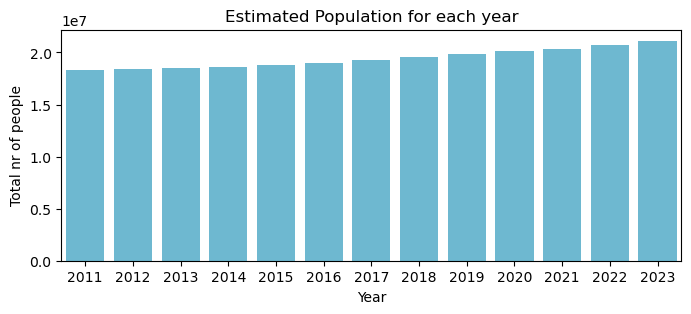

In [7]:
# Create a bar plot of the sum of population for each year
plt.figure(figsize=(8, 3))
sns.barplot(x=pop_grouped.index, y=pop_grouped.values, color="#5ec0e0")
plt.xlabel("Year")
plt.ylabel("Total nr of people")
plt.title("Estimated Population for each year")
plt.show()

In [8]:
#Creating aggregated data frame that will contain following data:

**from df_sap dataset:**
* Year [2011,2016,2022]
* Region - all 8 regions and 'Ireland'
* type of internet connection
* nr of households with internet connections

**from df_pop** 
* aggregated value of estimated population number for each region and year (they will be duplicated for each connection type)

**from df_aux**
* aggregated value of Private households number for each region and year (they will be duplicated for each connection type)
* aggregated value of Persons in private households number for each region and year (they will be duplicated for each connection type)

In [9]:
df_agg = df_sap.loc[:, ['Census Year', 'Internet','Name of Region','Households with Internet access']]

# Rename the columns of the new dataframe using the `rename()` method
df_agg.rename(columns={'Census Year': 'Year', 'Internet': 'Connection Type',
                       'Name of Region': 'Region'}, inplace=True)
df_agg.head()

,Year,Connection Type,Region,Households with Internet access
0,2011,Broadband,Border,106183
1,2011,Broadband,Dublin,339593
2,2011,Broadband,Mid-East,124424
3,2011,Broadband,Mid-West,79717
4,2011,Broadband,Midlands,55102


In [10]:
df_sap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Statistic Label                  125 non-null    object
 1   Census Year                      125 non-null    int64 
 2   Internet                         125 non-null    object
 3   Name of Region                   125 non-null    object
 4   UNIT                             125 non-null    object
 5   Households with Internet access  125 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 6.0+ KB


In [11]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Year                             125 non-null    int64 
 1   Connection Type                  125 non-null    object
 2   Region                           125 non-null    object
 3   Households with Internet access  125 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 4.0+ KB


In [12]:
pop_agg = df_pop.groupby(['Year', 'Region'])['Estimated Population'].sum()
pop_agg.head()

Year  Region  
2011  Border       784000.0
      Dublin      2523000.0
      Ireland     9149700.0
      Mid-East    1314900.0
      Mid-West     933600.0
Name: Estimated Population, dtype: float64

In [13]:
merged_df = df_agg.merge(pop_agg, on=['Year', 'Region'], how='left')
merged_df.head()

,Year,Connection Type,Region,Households with Internet access,Estimated Population
0,2011,Broadband,Border,106183,784000.0
1,2011,Broadband,Dublin,339593,2523000.0
2,2011,Broadband,Mid-East,124424,1314900.0
3,2011,Broadband,Mid-West,79717,933600.0
4,2011,Broadband,Midlands,55102,567600.0


In [14]:
df_ph = df_aux[df_aux['Statistic Label'] == 'Private households']
df_ph = df_ph[['CensusYear', 'Name of Region', 'VALUE']]
df_ph.rename(columns={'CensusYear': 'Year','Name of Region': 'Region', 'VALUE': 'Private households',}, inplace=True)
ph_agg = df_ph.groupby(['Year', 'Region'])['Private households'].sum()
ph_agg = ph_agg.reset_index()
ph_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                27 non-null     int64  
 1   Region              27 non-null     object 
 2   Private households  27 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 780.0+ bytes


In [15]:
merged_df = merged_df.merge(ph_agg, on=['Year', 'Region'], how='left')
merged_df.head()

,Year,Connection Type,Region,Households with Internet access,Estimated Population,Private households
0,2011,Broadband,Border,106183,784000.0,185851.0
1,2011,Broadband,Dublin,339593,2523000.0,466992.0
2,2011,Broadband,Mid-East,124424,1314900.0,180762.0
3,2011,Broadband,Mid-West,79717,933600.0,170794.0
4,2011,Broadband,Midlands,55102,567600.0,99962.0


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             125 non-null    int64  
 1   Connection Type                  125 non-null    object 
 2   Region                           125 non-null    object 
 3   Households with Internet access  125 non-null    int64  
 4   Estimated Population             125 non-null    float64
 5   Private households               125 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.0+ KB


In [17]:
df_pph = df_aux[df_aux['Statistic Label'] == 'Persons in private households']
df_pph = df_pph[['CensusYear', 'Name of Region', 'VALUE']]
df_pph.rename(columns={'CensusYear': 'Year','Name of Region': 'Region', 'VALUE': 'Persons in private households',}, inplace=True)
pph_agg = df_pph.groupby(['Year', 'Region'])['Persons in private households'].sum()
pph_agg = pph_agg.reset_index()
pph_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           27 non-null     int64  
 1   Region                         27 non-null     object 
 2   Persons in private households  27 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 780.0+ bytes


In [18]:
pph_agg.head()

,Year,Region,Persons in private households
0,2011,Border,509799.0
1,2011,Dublin,1237934.0
2,2011,Ireland,4510409.0
3,2011,Mid-East,528117.0
4,2011,Mid-West,461236.0


In [19]:
pph_agg.Year.unique()

array([2011, 2016, 2022], dtype=int64)

In [20]:
pph_agg.Region.unique()

array(['Border', 'Dublin', 'Ireland', 'Mid-East', 'Mid-West', 'Midlands',
       'South-East', 'South-West', 'West'], dtype=object)

In [21]:
merged_df = merged_df.merge(pph_agg, on=['Year', 'Region'], how='left')
merged_df.head()

,Year,Connection Type,Region,Households with Internet access,Estimated Population,Private households,Persons in private households
0,2011,Broadband,Border,106183,784000.0,185851.0,509799.0
1,2011,Broadband,Dublin,339593,2523000.0,466992.0,1237934.0
2,2011,Broadband,Mid-East,124424,1314900.0,180762.0,528117.0
3,2011,Broadband,Mid-West,79717,933600.0,170794.0,461236.0
4,2011,Broadband,Midlands,55102,567600.0,99962.0,279880.0


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             125 non-null    int64  
 1   Connection Type                  125 non-null    object 
 2   Region                           125 non-null    object 
 3   Households with Internet access  125 non-null    int64  
 4   Estimated Population             125 non-null    float64
 5   Private households               125 non-null    float64
 6   Persons in private households    125 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 7.0+ KB


In [23]:
merged_df.to_csv("process.csv", index = False)